<a href="https://colab.research.google.com/github/koushik0416/eda/blob/main/MACHINE_LEARNING_EVALUTION_MATRIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **naive bayes**

In [ ]:
import pandas as pd

# Step 1: Create Dataset
data = {
    'Vehicle Type': ['Car', 'Bike', 'Car', 'Bike', 'Car', 'Bike', 'Bike', 'Car', 'Bike', 'Car'],
    'Fuel Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
    'Owner Income Level': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'High', 'Medium', 'High'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Step 2: Convert Data to DataFrame
df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Step 3: Calculate Prior Probabilities
P_yes = df['Purchase'].value_counts()['Yes'] / len(df)
P_no = df['Purchase'].value_counts()['No'] / len(df)

print("\nPrior Probabilities:")
print(f"P(Yes) = {P_yes}")
print(f"P(No) = {P_no}")

# Step 4: Calculate Likelihoods
P_vehicle_yes = len(df[(df['Vehicle Type'] == 'Car') & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
P_vehicle_no = len(df[(df['Vehicle Type'] == 'Car') & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

P_fuel_yes = len(df[(df['Fuel Type'] == 'Petrol') & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
P_fuel_no = len(df[(df['Fuel Type'] == 'Petrol') & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

P_income_yes = len(df[(df['Owner Income Level'] == 'High') & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
P_income_no = len(df[(df['Owner Income Level'] == 'High') & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

print("\nLikelihoods:")
print(f"P(Vehicle Type='Car' | Yes) = {P_vehicle_yes}")
print(f"P(Vehicle Type='Car' | No) = {P_vehicle_no}")
print(f"P(Fuel Type='Petrol' | Yes) = {P_fuel_yes}")
print(f"P(Fuel Type='Petrol' | No) = {P_fuel_no}")
print(f"P(Owner Income Level='High' | Yes) = {P_income_yes}")
print(f"P(Owner Income Level='High' | No) = {P_income_no}")

# Step 5: Calculate Posterior Probabilities
P_yes_given_attributes = P_vehicle_yes * P_fuel_yes * P_income_yes * P_yes
P_no_given_attributes = P_vehicle_no * P_fuel_no * P_income_no * P_no

print("\nPosterior Probabilities:")
print(f"P(Yes | Vehicle Type='Car', Fuel Type='Petrol', Owner Income Level='High') = {P_yes_given_attributes}")
print(f"P(No | Vehicle Type='Car', Fuel Type='Petrol', Owner Income Level='High') = {P_no_given_attributes}")

# Step 6: Make Prediction
if P_yes_given_attributes > P_no_given_attributes:
    print("\nPrediction: Purchase = Yes")
else:
    print("\nPrediction: Purchase = No")


Dataset:
  Vehicle Type Fuel Type Owner Income Level Purchase
0          Car    Petrol               High      Yes
1         Bike    Diesel                Low       No
2          Car    Diesel             Medium      Yes
3         Bike    Petrol             Medium       No
4          Car    Petrol               High      Yes
5         Bike    Diesel                Low       No
6         Bike    Diesel                Low       No
7          Car    Petrol               High      Yes
8         Bike    Petrol             Medium      Yes
9          Car    Diesel               High       No

Prior Probabilities:
P(Yes) = 0.5
P(No) = 0.5

Likelihoods:
P(Vehicle Type='Car' | Yes) = 0.8
P(Vehicle Type='Car' | No) = 0.2
P(Fuel Type='Petrol' | Yes) = 0.8
P(Fuel Type='Petrol' | No) = 0.2
P(Owner Income Level='High' | Yes) = 0.6
P(Owner Income Level='High' | No) = 0.2

Posterior Probabilities:
P(Yes | Vehicle Type='Car', Fuel Type='Petrol', Owner Income Level='High') = 0.19200000000000003
P(No | Ve

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Create Dataset
data = {
    'Vehicle Type': ['Car', 'Bike', 'Car', 'Bike', 'Car', 'Bike', 'Bike', 'Car', 'Bike', 'Car'],
    'Fuel Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
    'Owner Income Level': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'High', 'Medium', 'High'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Step 2: Convert Data to DataFrame
df = pd.DataFrame(data)

# Step 3: Calculate Prior Probabilities
P_yes = df['Purchase'].value_counts()['Yes'] / len(df)
P_no = df['Purchase'].value_counts()['No'] / len(df)

# Step 4: Function to Calculate Likelihoods for each attribute
def calculate_likelihoods(df, vehicle_type, fuel_type, income_level):
    # Likelihoods for 'Yes'
    P_vehicle_yes = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_fuel_yes = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_income_yes = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']

    # Likelihoods for 'No'
    P_vehicle_no = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_fuel_no = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_income_no = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

    # Posterior Probabilities
    P_yes_given_attributes = P_vehicle_yes * P_fuel_yes * P_income_yes * P_yes
    P_no_given_attributes = P_vehicle_no * P_fuel_no * P_income_no * P_no

    return P_yes_given_attributes, P_no_given_attributes

# Step 5: Predict for all rows
predictions = []
for index, row in df.iterrows():
    P_yes_given_attributes, P_no_given_attributes = calculate_likelihoods(df, row['Vehicle Type'], row['Fuel Type'], row['Owner Income Level'])

    if P_yes_given_attributes > P_no_given_attributes:
        predictions.append('Yes')
    else:
        predictions.append('No')

# Step 6: Add Predictions to the DataFrame
df['Predicted Purchase'] = predictions

# Step 7: Calculate Evaluation Metrics
actual = df['Purchase']
predicted = df['Predicted Purchase']

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label='Yes')
recall = recall_score(actual, predicted, pos_label='Yes')
f1 = f1_score(actual, predicted, pos_label='Yes')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Print the DataFrame with actual vs predicted
print("\nDataset with Predictions:")
print(df)


Accuracy: 0.8
Precision: 0.7142857142857143
Recall: 1.0
F1-Score: 0.8333333333333334

Dataset with Predictions:
  Vehicle Type Fuel Type Owner Income Level Purchase Predicted Purchase
0          Car    Petrol               High      Yes                Yes
1         Bike    Diesel                Low       No                 No
2          Car    Diesel             Medium      Yes                Yes
3         Bike    Petrol             Medium       No                Yes
4          Car    Petrol               High      Yes                Yes
5         Bike    Diesel                Low       No                 No
6         Bike    Diesel                Low       No                 No
7          Car    Petrol               High      Yes                Yes
8         Bike    Petrol             Medium      Yes                Yes
9          Car    Diesel               High       No                Yes


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Create Dataset
data = {
    'Vehicle Type': ['Car', 'Bike', 'Car', 'Bike', 'Car', 'Bike', 'Bike', 'Car', 'Bike', 'Car'],
    'Fuel Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
    'Owner Income Level': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'High', 'Medium', 'High'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Step 2: Convert Data to DataFrame
df = pd.DataFrame(data)

# Step 3: Calculate Prior Probabilities
P_yes = df['Purchase'].value_counts()['Yes'] / len(df)
P_no = df['Purchase'].value_counts()['No'] / len(df)

# Step 4: Function to Calculate Likelihoods for each attribute
def calculate_likelihoods(df, vehicle_type, fuel_type, income_level):
    # Likelihoods for 'Yes'
    P_vehicle_yes = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_fuel_yes = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_income_yes = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']

    # Likelihoods for 'No'
    P_vehicle_no = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_fuel_no = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_income_no = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

    # Posterior Probabilities
    P_yes_given_attributes = P_vehicle_yes * P_fuel_yes * P_income_yes * P_yes
    P_no_given_attributes = P_vehicle_no * P_fuel_no * P_income_no * P_no

    return P_yes_given_attributes, P_no_given_attributes

# Step 5: Predict for all rows
predictions = []
for index, row in df.iterrows():
    P_yes_given_attributes, P_no_given_attributes = calculate_likelihoods(df, row['Vehicle Type'], row['Fuel Type'], row['Owner Income Level'])

    if P_yes_given_attributes > P_no_given_attributes:
        predictions.append('Yes')
    else:
        predictions.append('No')

# Step 6: Add Predictions to the DataFrame
df['Predicted Purchase'] = predictions

# Step 7: Calculate Evaluation Metrics
actual = df['Purchase']
predicted = df['Predicted Purchase']

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label='Yes')
recall = recall_score(actual, predicted, pos_label='Yes')
f1 = f1_score(actual, predicted, pos_label='Yes')

# Confusion Matrix
conf_matrix = confusion_matrix(actual, predicted, labels=['Yes', 'No'])

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Print the DataFrame with actual vs predicted
print("\nDataset with Predictions:")
print(df)


Accuracy: 0.8
Precision: 0.7142857142857143
Recall: 1.0
F1-Score: 0.8333333333333334

Confusion Matrix:
[[5 0]
 [2 3]]

Dataset with Predictions:
  Vehicle Type Fuel Type Owner Income Level Purchase Predicted Purchase
0          Car    Petrol               High      Yes                Yes
1         Bike    Diesel                Low       No                 No
2          Car    Diesel             Medium      Yes                Yes
3         Bike    Petrol             Medium       No                Yes
4          Car    Petrol               High      Yes                Yes
5         Bike    Diesel                Low       No                 No
6         Bike    Diesel                Low       No                 No
7          Car    Petrol               High      Yes                Yes
8         Bike    Petrol             Medium      Yes                Yes
9          Car    Diesel               High       No                Yes


Accuracy: 0.8
Precision: 0.7142857142857143
Recall: 1.0
F1-Score: 0.8333333333333334

Confusion Matrix:
[[5 0]
 [2 3]]


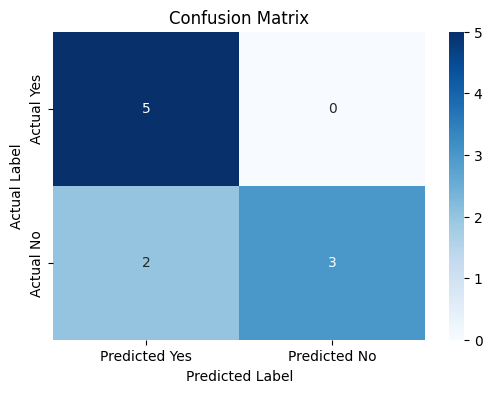


Dataset with Predictions:
  Vehicle Type Fuel Type Owner Income Level Purchase Predicted Purchase
0          Car    Petrol               High      Yes                Yes
1         Bike    Diesel                Low       No                 No
2          Car    Diesel             Medium      Yes                Yes
3         Bike    Petrol             Medium       No                Yes
4          Car    Petrol               High      Yes                Yes
5         Bike    Diesel                Low       No                 No
6         Bike    Diesel                Low       No                 No
7          Car    Petrol               High      Yes                Yes
8         Bike    Petrol             Medium      Yes                Yes
9          Car    Diesel               High       No                Yes


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Dataset
data = {
    'Vehicle Type': ['Car', 'Bike', 'Car', 'Bike', 'Car', 'Bike', 'Bike', 'Car', 'Bike', 'Car'],
    'Fuel Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
    'Owner Income Level': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'High', 'Medium', 'High'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Step 2: Convert Data to DataFrame
df = pd.DataFrame(data)

# Step 3: Calculate Prior Probabilities
P_yes = df['Purchase'].value_counts()['Yes'] / len(df)
P_no = df['Purchase'].value_counts()['No'] / len(df)

# Step 4: Function to Calculate Likelihoods for each attribute
def calculate_likelihoods(df, vehicle_type, fuel_type, income_level):
    # Likelihoods for 'Yes'
    P_vehicle_yes = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_fuel_yes = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']
    P_income_yes = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'Yes')]) / df['Purchase'].value_counts()['Yes']

    # Likelihoods for 'No'
    P_vehicle_no = len(df[(df['Vehicle Type'] == vehicle_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_fuel_no = len(df[(df['Fuel Type'] == fuel_type) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']
    P_income_no = len(df[(df['Owner Income Level'] == income_level) & (df['Purchase'] == 'No')]) / df['Purchase'].value_counts()['No']

    # Posterior Probabilities
    P_yes_given_attributes = P_vehicle_yes * P_fuel_yes * P_income_yes * P_yes
    P_no_given_attributes = P_vehicle_no * P_fuel_no * P_income_no * P_no

    return P_yes_given_attributes, P_no_given_attributes

# Step 5: Predict for all rows
predictions = []
for index, row in df.iterrows():
    P_yes_given_attributes, P_no_given_attributes = calculate_likelihoods(df, row['Vehicle Type'], row['Fuel Type'], row['Owner Income Level'])

    if P_yes_given_attributes > P_no_given_attributes:
        predictions.append('Yes')
    else:
        predictions.append('No')

# Step 6: Add Predictions to the DataFrame
df['Predicted Purchase'] = predictions

# Step 7: Calculate Evaluation Metrics
actual = df['Purchase']
predicted = df['Predicted Purchase']

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label='Yes')
recall = recall_score(actual, predicted, pos_label='Yes')
f1 = f1_score(actual, predicted, pos_label='Yes')

# Confusion Matrix
conf_matrix = confusion_matrix(actual, predicted, labels=['Yes', 'No'])

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['Actual Yes', 'Actual No'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the DataFrame with actual vs predicted
print("\nDataset with Predictions:")
print(df)


In [ ]:
import math
from collections import Counter

# Function to calculate entropy
def entropy(data):
    total_instances = len(data)
    if total_instances == 0:
        return 0
    label_counts = Counter([row[-1] for row in data])
    ent = 0.0
    for count in label_counts.values():
        prob = count / total_instances
        ent -= prob * math.log2(prob)
    return ent

# Function to split data based on an attribute
def split_data(data, attribute_index, value):
    subset = []
    for row in data:
        if row[attribute_index] == value:
            reduced_row = row[:attribute_index] + row[attribute_index + 1:]
            subset.append(reduced_row)
    return subset

# Function to calculate information gain
def information_gain(data, attribute_index):
    total_entropy = entropy(data)
    values = set([row[attribute_index] for row in data])
    weighted_entropy = 0.0
    for value in values:
        subset = split_data(data, attribute_index, value)
        prob = len(subset) / len(data)
        subset_entropy = entropy(subset)
        weighted_entropy += prob * subset_entropy
        print(f"Subset for {value} in attribute {attribute_index}: Entropy = {subset_entropy:.4f}, Weight = {prob:.4f}")
    info_gain = total_entropy - weighted_entropy
    print(f"Information Gain for attribute {attribute_index}: {info_gain:.4f}\n")
    return info_gain

# Function to choose the best attribute to split on
def choose_best_attribute(data):
    num_attributes = len(data[0]) - 1
    best_gain = 0.0
    best_attribute = None
    for i in range(num_attributes):
        print(f"Calculating Information Gain for Attribute {i}")
        gain = information_gain(data, i)
        if gain > best_gain:
            best_gain = gain
            best_attribute = i
    return best_attribute

# Function to build the decision tree using the ID3 algorithm
def id3(data, labels):
    # If all examples have the same label, return that label
    labels_count = [row[-1] for row in data]
    if labels_count.count(labels_count[0]) == len(labels_count):
        return labels_count[0]

    # If no more attributes, return the most common label
    if len(data[0]) == 1:
        return Counter(labels_count).most_common(1)[0][0]

    best_attribute = choose_best_attribute(data)
    best_label = labels[best_attribute]

    # Create the root of the tree
    tree = {best_label: {}}

    # Remove the best attribute from the list of labels
    del(labels[best_attribute])

    attribute_values = set([row[best_attribute] for row in data])
    for value in attribute_values:
        subset = split_data(data, best_attribute, value)
        subtree = id3(subset, labels[:])  # Pass a copy of the labels list
        tree[best_label][value] = subtree
    return tree

# Example dataset: [Outlook, Temperature, Humidity, Windy, PlayTennis]
data = [
    ['Sunny', 'Hot', 'High', False, 'No'],
    ['Sunny', 'Hot', 'High', True, 'No'],
    ['Overcast', 'Hot', 'High', False, 'Yes'],
    ['Rainy', 'Mild', 'High', False, 'Yes'],
    ['Rainy', 'Cool', 'Normal', False, 'Yes'],
    ['Rainy', 'Cool', 'Normal', True, 'No'],
    ['Overcast', 'Cool', 'Normal', True, 'Yes'],
    ['Sunny', 'Mild', 'High', False, 'No'],
    ['Sunny', 'Cool', 'Normal', False, 'Yes'],
    ['Rainy', 'Mild', 'Normal', False, 'Yes'],
    ['Sunny', 'Mild', 'Normal', True, 'Yes'],
    ['Overcast', 'Mild', 'High', True, 'Yes'],
    ['Overcast', 'Hot', 'Normal', False, 'Yes'],
    ['Rainy', 'Mild', 'High', True, 'No'],
]

# Labels of the attributes
labels = ['Outlook', 'Temperature', 'Humidity', 'Windy']

# Build the decision tree
decision_tree = id3(data, labels[:])  # Pass a copy of labels to preserve original list

print("Decision Tree:")
print(decision_tree)


Calculating Information Gain for Attribute 0
Subset for Overcast in attribute 0: Entropy = 0.0000, Weight = 0.2857
Subset for Rainy in attribute 0: Entropy = 0.9710, Weight = 0.3571
Subset for Sunny in attribute 0: Entropy = 0.9710, Weight = 0.3571
Information Gain for attribute 0: 0.2467

Calculating Information Gain for Attribute 1
Subset for Hot in attribute 1: Entropy = 1.0000, Weight = 0.2857
Subset for Mild in attribute 1: Entropy = 0.9183, Weight = 0.4286
Subset for Cool in attribute 1: Entropy = 0.8113, Weight = 0.2857
Information Gain for attribute 1: 0.0292

Calculating Information Gain for Attribute 2
Subset for Normal in attribute 2: Entropy = 0.5917, Weight = 0.5000
Subset for High in attribute 2: Entropy = 0.9852, Weight = 0.5000
Information Gain for attribute 2: 0.1518

Calculating Information Gain for Attribute 3
Subset for False in attribute 3: Entropy = 0.8113, Weight = 0.5714
Subset for True in attribute 3: Entropy = 1.0000, Weight = 0.4286
Information Gain for attri

In [ ]:
import math
from collections import Counter

# Function to calculate entropy
def entropy(data):
    total_instances = len(data)
    if total_instances == 0:
        return 0
    label_counts = Counter([row[-1] for row in data])
    ent = 0.0
    for count in label_counts.values():
        prob = count / total_instances
        ent -= prob * math.log2(prob)
    return ent

# Function to split data based on an attribute
def split_data(data, attribute_index, value):
    subset = []
    for row in data:
        if row[attribute_index] == value:
            reduced_row = row[:attribute_index] + row[attribute_index + 1:]
            subset.append(reduced_row)
    return subset

# Function to calculate information gain
def information_gain(data, attribute_index):
    total_entropy = entropy(data)
    values = set([row[attribute_index] for row in data])
    weighted_entropy = 0.0
    for value in values:
        subset = split_data(data, attribute_index, value)
        prob = len(subset) / len(data)
        subset_entropy = entropy(subset)
        weighted_entropy += prob * subset_entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Function to choose the best attribute to split on
def choose_best_attribute(data):
    num_attributes = len(data[0]) - 1
    best_gain = 0.0
    best_attribute = None
    for i in range(num_attributes):
        gain = information_gain(data, i)
        if gain > best_gain:
            best_gain = gain
            best_attribute = i
    return best_attribute

# Function to build the decision tree using ID3 algorithm
def id3(data, labels):
    labels_count = [row[-1] for row in data]
    if labels_count.count(labels_count[0]) == len(labels_count):
        return labels_count[0]
    if len(data[0]) == 1:
        return Counter(labels_count).most_common(1)[0][0]

    best_attribute = choose_best_attribute(data)
    best_label = labels[best_attribute]
    tree = {best_label: {}}
    del(labels[best_attribute])

    attribute_values = set([row[best_attribute] for row in data])
    for value in attribute_values:
        subset = split_data(data, best_attribute, value)
        subtree = id3(subset, labels[:])
        tree[best_label][value] = subtree
    return tree

# Function to predict the label for a single instance using the decision tree
def predict(tree, labels, instance):
    if not isinstance(tree, dict):
        return tree
    attribute = next(iter(tree))
    attribute_index = labels.index(attribute)
    subtree = tree[attribute].get(instance[attribute_index], None)
    if subtree is None:
        return None  # Handle unknown cases
    return predict(subtree, labels, instance)

# Example dataset: [Outlook, Temperature, Humidity, Windy, PlayTennis]
data = [
    ['Sunny', 'Hot', 'High', False, 'No'],
    ['Sunny', 'Hot', 'High', True, 'No'],
    ['Overcast', 'Hot', 'High', False, 'Yes'],
    ['Rainy', 'Mild', 'High', False, 'Yes'],
    ['Rainy', 'Cool', 'Normal', False, 'Yes'],
    ['Rainy', 'Cool', 'Normal', True, 'No'],
    ['Overcast', 'Cool', 'Normal', True, 'Yes'],
    ['Sunny', 'Mild', 'High', False, 'No'],
    ['Sunny', 'Cool', 'Normal', False, 'Yes'],
    ['Rainy', 'Mild', 'Normal', False, 'Yes'],
    ['Sunny', 'Mild', 'Normal', True, 'Yes'],
    ['Overcast', 'Mild', 'High', True, 'Yes'],
    ['Overcast', 'Hot', 'Normal', False, 'Yes'],
    ['Rainy', 'Mild', 'High', True, 'No'],
]

# Labels of the attributes
labels = ['Outlook', 'Temperature', 'Humidity', 'Windy']

# Build the decision tree
decision_tree = id3(data, labels[:])

# Predict function for the entire dataset
def predict_dataset(tree, labels, dataset):
    predictions = []
    for instance in dataset:
        pred = predict(tree, labels, instance[:-1])  # Exclude the true label
        predictions.append(pred)
    return predictions

# Get the true labels and predicted labels
y_true = [row[-1] for row in data]
y_pred = predict_dataset(decision_tree, labels, data)

# Output predictions
print("Predicted Labels:", y_pred)
print("True Labels:", y_true)


Predicted Labels: ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
True Labels: ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_true, y_pred, pos_label='Yes')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true, y_pred, pos_label='Yes')
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_true, y_pred, pos_label='Yes')
print(f"F1-Score: {f1:.4f}")


Confusion Matrix:
[[5 0]
 [0 9]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


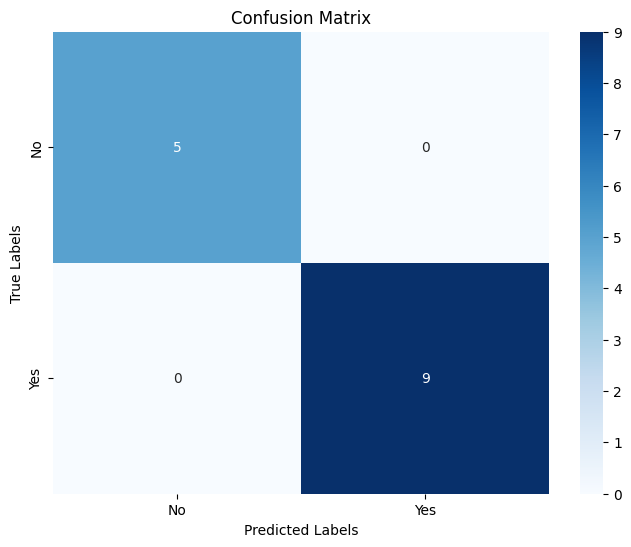

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix calculation
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


New data points:  [(1, 5), (3, 7), (6, 2), (8, 9), (10, 4), (12, 12), (14, 3), (16, 15), (18, 11), (20, 6)]
Predicted class for the new point with k=5: 1


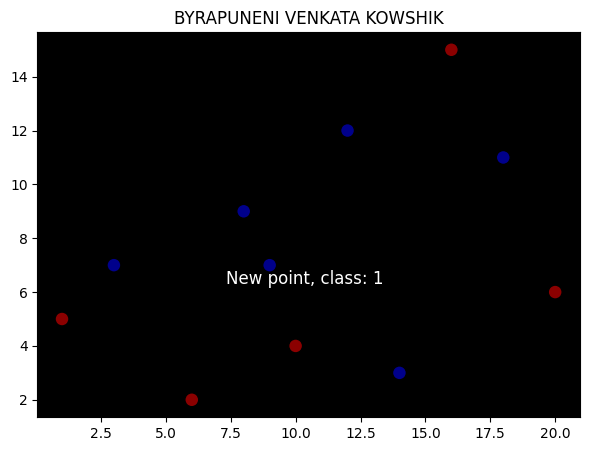


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.40      0.44         5
     Class 1       0.50      0.60      0.55         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



<Figure size 800x600 with 0 Axes>

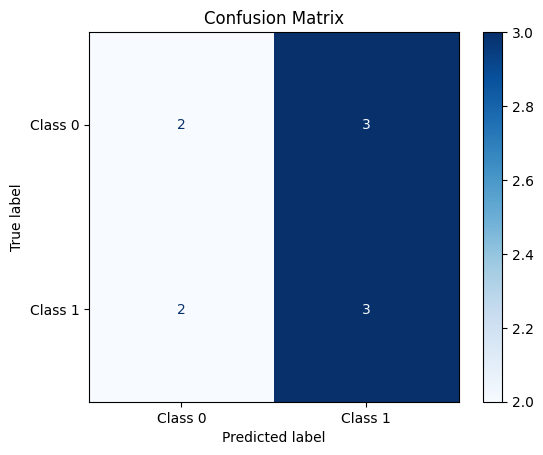

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Defining new coordinates of points and their class labels
x = [1, 3, 6, 8, 10, 12, 14, 16, 18, 20]
y = [5, 7, 2, 9, 4, 12, 3, 15, 11, 6]
classes = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

# Combine x and y coordinates into data points
data = list(zip(x, y))
print("New data points: ", data)

# Initialize the k-NN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(data, classes)

# New point to be classified
new_x, new_y = 9, 7
new_point = [(new_x, new_y)]

# Predicting the class of the new point
prediction = knn_model.predict(new_point)
print(f"Predicted class for the new point with k=5: {prediction[0]}")

# Visualizing the original points and the new point
plt.figure(figsize=(7, 5))
color_map = {0: 'darkred', 1: 'darkblue'}
point_colors = [color_map[label] for label in classes]
plt.scatter(x + [new_x], y + [new_y], c=point_colors + [color_map[prediction[0]]], edgecolor='black', s=100)
plt.text(new_x - 1.7, new_y - 0.7, s=f"New point, class: {prediction[0]}", fontsize=12, color='white')
plt.title("BYRAPUNENI VENKATA KOWSHIK")
plt.gca().set_facecolor('black')  # Set the background to black for better contrast
plt.show()

# For evaluation, we'll predict on the original dataset
predictions = knn_model.predict(data)

# Confusion Matrix Calculation
cm = confusion_matrix(classes, predictions)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(classes, predictions, target_names=['Class 0', 'Class 1']))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# New dataset: Features are Age and Income, Target is purchase (1) or no purchase (0)
X = np.array([
[19, 25], [24, 30], [28, 45], [35, 50], [40, 60],
[45, 80], [50, 90], [55, 100], [60, 110], [65, 120]
])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
# Spli􀆫ng the data into 70% training and 30% tes􀆟ng sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crea􀆟ng and training a Logis􀆟c Regression model
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
# Making predic􀆟ons on the test set
y_pred = log_reg.predict(X_test)
# Calcula􀆟ng accuracy and displaying the confusion matrix and classifica􀆟on report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Output model evalua􀆟on metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassifica􀆟on Report:")
print(class_report)
# Predic􀆟ng for a new customer (age 52, income 95,000)
new_customer = np.array([[52, 95]])
prediction = log_reg.predict(new_customer)
print(f"Predic􀆟on for customer age 52 and income $95,000: {prediction[0]}")
# Plo􀆫ng decision boundary and data points
plt.figure(figsize=(10, 6))
# Dark green for 'No Purchase' (0) and dark orange for 'Purchase' (1)
plt.scaler(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='darkgreen', label='No Purchase')
plt.scaler(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='darkorange', label='Purchase')
# Crea􀆟ng a mesh grid for the decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# Predic􀆟ng over the mesh grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Custom colormap: dark grey for class 0 and dark purple for class 1
cmap_light = ListedColormap(['darkgray', 'rebeccapurple']) # Changed 'darkpurple' to 'rebeccapurple'
# Plo􀆫ng the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 2]]

Classifica􀆟on Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Predic􀆟on for customer age 52 and income $95,000: 1


AttributeError: module 'matplotlib.pyplot' has no attribute 'scaler'

<Figure size 1000x600 with 0 Axes>

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Prediction for customer age 52 and income $95,000: 1


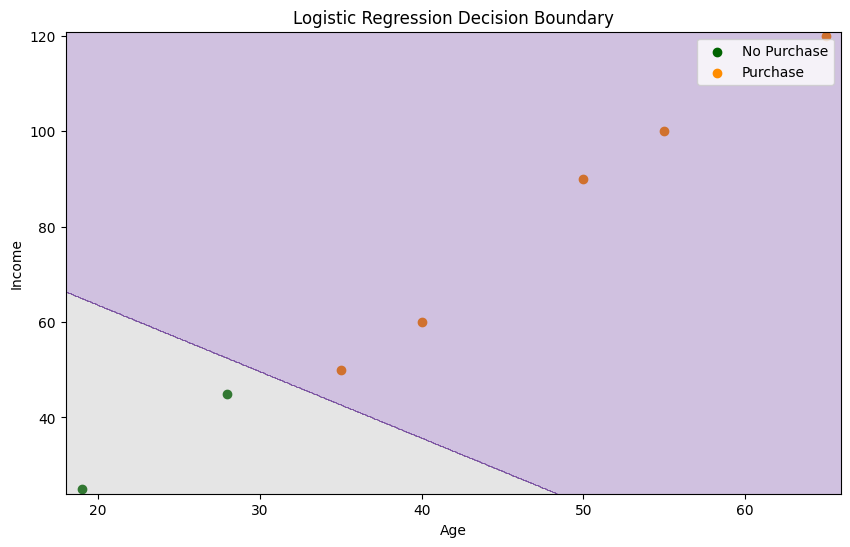

<Figure size 800x600 with 0 Axes>

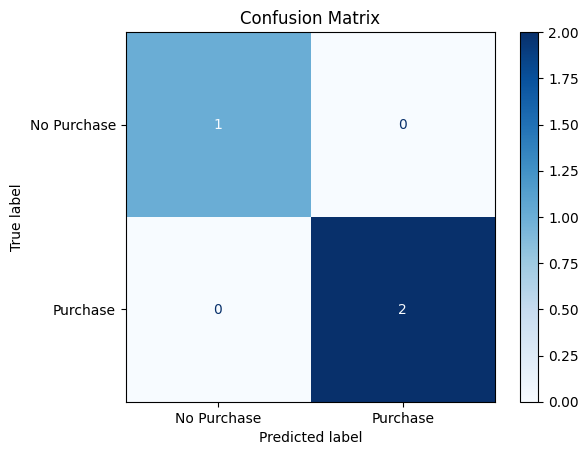

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# New dataset: Features are Age and Income, Target is purchase (1) or no purchase (0)
X = np.array([
    [19, 25], [24, 30], [28, 45], [35, 50], [40, 60],
    [45, 80], [50, 90], [55, 100], [60, 110], [65, 120]
])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

# Splitting the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training a Logistic Regression model
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculating accuracy and displaying the confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output model evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Predicting for a new customer (age 52, income 95,000)
new_customer = np.array([[52, 95]])
prediction = log_reg.predict(new_customer)
print(f"Prediction for customer age 52 and income $95,000: {prediction[0]}")

# Plotting decision boundary and data points
plt.figure(figsize=(10, 6))
# Dark green for 'No Purchase' (0) and dark orange for 'Purchase' (1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='darkgreen', label='No Purchase')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='darkorange', label='Purchase')

# Creating a mesh grid for the decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting over the mesh grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Custom colormap: dark grey for class 0 and dark purple for class 1
cmap_light = ListedColormap(['darkgray', 'rebeccapurple'])
# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Purchase', 'Purchase']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Initial DataFrame:
   rooms  square_footage  location  proximity_school  distance_shopping  \
0      7            2302     rural                 0           7.278575   
1      4            4561     urban                 0           1.120191   
2      8            3869     urban                 0          11.199949   
3      5             762     rural                 1          10.921258   
4      7            1123  suburban                 0           7.441834   

   price_above_500k  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  
Iteration 1, loss = 0.70244470
Iteration 2, loss = 0.70188615
Iteration 3, loss = 0.70133618
Iteration 4, loss = 0.70078943
Iteration 5, loss = 0.70023453
Iteration 6, loss = 0.69968044
Iteration 7, loss = 0.69912976
Iteration 8, loss = 0.69858216
Iteration 9, loss = 0.69803819
Iteration 10, loss = 0.69750687
Iteration 11, loss = 0.69698245
Iteration 12, loss = 0.69646480
Iteration 13, loss = 0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

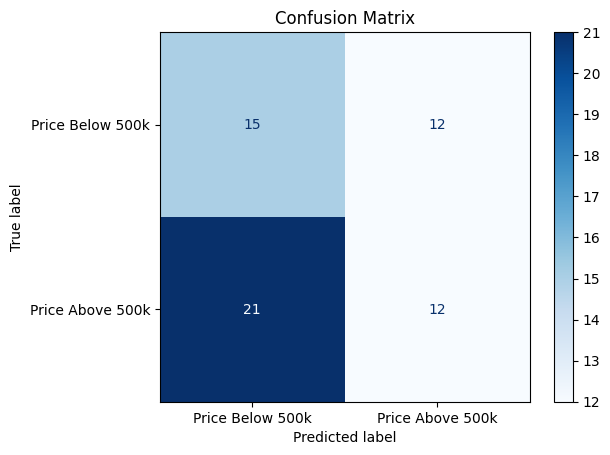

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset for house price prediction
n_samples = 200
# Features: Random values for rooms, square footage, proximity to school, distance to shopping center
rooms = np.random.randint(1, 10, n_samples)
square_footage = np.random.randint(500, 5000, n_samples)
location = np.random.choice(['urban', 'suburban', 'rural'], n_samples)
proximity_school = np.random.randint(0, 2, n_samples)  # Binary (0 = far, 1 = near)
distance_shopping = np.random.uniform(0.5, 20, n_samples)

# Target: Binary variable indicating if house price is above or below $500,000
price_above_500k = np.random.randint(0, 2, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'rooms': rooms,
    'square_footage': square_footage,
    'location': location,
    'proximity_school': proximity_school,
    'distance_shopping': distance_shopping,
    'price_above_500k': price_above_500k
})

# Display the first few rows of the dataset
print("Initial DataFrame:")
print(data.head())

# Encode 'location' using LabelEncoder
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])

# Separate features (X) and target (y)
X = data[['rooms', 'square_footage', 'location', 'proximity_school', 'distance_shopping']]
y = data['price_above_500k']

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(8, 5), solver='adam', learning_rate_init=0.001, max_iter=500,
                    random_state=42, verbose=True)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Price Below 500k', 'Price Above 500k']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
